In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_30_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_30_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1579.8937

Best Fitness:	1186.2346
Solution:	700.0000
Diff:		486.2346

[0:00:17][----------] 1.96% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1616.9321

Best Fitness:	1138.2782
Solution:	700.0000
Diff:		438.2782

[0:00:32][----------] 3.92% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1670.3454

Best Fitness:	1230.2694
Solution:	700.0000
Diff:		530.2694

[0:00:47][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1625.0119

Best Fitness:	1084.7633
Solution:	700.0000
Diff:		384.7633

[0:01:02][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1652.6786

Best Fitness:	1268.3706
Solution:	700.0000
Diff:		568.3706

[0:01:17][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1592.2691

Best Fitness:	1131.9541
Solution:	700.0000
Diff:		431.9541

[0:01:41][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1663.9184

Best Fitness:	1209.4764
Solution:	700.0000
Diff:		509.4764

[0:01:58][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1691.9389

Best Fitness:	1283.1595
Solution:	700.0000
Diff:		583.1595

[0:02:11][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1619.8491

Best Fitness:	1168.1611
Solution:	700.0000
Diff:		468.1611

[0:02:30][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1662.7319

Best Fitness:	1192.1264
Solution:	700.0000
Diff:		492.1264

[0:02:43][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1615.1100

Best Fitness:	1208.1518
Solution:	700.0000
Diff:		508.1518

[0:02:58][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1646.8623

Best Fitness:	1163.9974
Solution:	700.0000
Diff:		463.9974

[0:03:09][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1653.6059

Best Fitness:	1128.1591
Solution:	700.0000
Diff:		428.1591

[0:03:19][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1723.3638

Best Fitness:	1297.9729
Solution:	700.0000
Diff:		597.9729

[0:03:38][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1674.3972

Best Fitness:	1186.2934
Solution:	700.0000
Diff:		486.2934

[0:03:48][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1619.2167

Best Fitness:	1233.0707
Solution:	700.0000
Diff:		533.0707

[0:03:58][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1663.6623

Best Fitness:	1202.1339
Solution:	700.0000
Diff:		502.1339

[0:04:12][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1621.4316

Best Fitness:	997.8651
Solution:	700.0000
Diff:		297.8651

[0:04:24][####------] 35.29% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1658.8705

Best Fitness:	1245.0368
Solution:	700.0000
Diff:		545.0368

[0:04:36][####------] 37.25% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1689.1845

Best Fitness:	1128.6476
Solution:	700.0000
Diff:		428.6476

[0:04:50][####------] 39.22% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1664.0972

Best Fitness:	1188.1007
Solution:	700.0000
Diff:		488.1007

[0:05:02][####------] 41.18% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1677.9175

Best Fitness:	1161.8446
Solution:	700.0000
Diff:		461.8446

[0:05:23][####------] 43.14% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1697.8382

Best Fitness:	1189.1080
Solution:	700.0000
Diff:		489.1080

[0:05:38][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1673.2678

Best Fitness:	1156.5989
Solution:	700.0000
Diff:		456.5989

[0:05:48][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1688.9868

Best Fitness:	1166.0180
Solution:	700.0000
Diff:		466.0180

[0:06:11][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1645.6860

Best Fitness:	1138.6836
Solution:	700.0000
Diff:		438.6836

[0:06:21][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1594.3105

Best Fitness:	1025.3440
Solution:	700.0000
Diff:		325.3440

[0:06:32][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1712.5411

Best Fitness:	1286.1717
Solution:	700.0000
Diff:		586.1717

[0:06:47][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1607.0876

Best Fitness:	1137.5153
Solution:	700.0000
Diff:		437.5153

[0:06:56][######----] 56.86% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1650.5405

Best Fitness:	1152.2736
Solution:	700.0000
Diff:		452.2736

[0:07:07][######----] 58.82% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1677.9611

Best Fitness:	1242.8967
Solution:	700.0000
Diff:		542.8967

[0:07:27][######----] 60.78% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1631.8475

Best Fitness:	1114.0878
Solution:	700.0000
Diff:		414.0878

[0:07:41][######----] 62.75% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1652.4237

Best Fitness:	1225.9451
Solution:	700.0000
Diff:		525.9451

[0:07:52][######----] 64.71% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1680.2109

Best Fitness:	1132.9112
Solution:	700.0000
Diff:		432.9112

[0:08:04][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1738.5618

Best Fitness:	1230.3786
Solution:	700.0000
Diff:		530.3786

[0:08:18][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1630.7972

Best Fitness:	1013.2967
Solution:	700.0000
Diff:		313.2967

[0:08:30][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1679.1073

Best Fitness:	1123.3128
Solution:	700.0000
Diff:		423.3128

[0:08:39][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1686.6913

Best Fitness:	1173.4594
Solution:	700.0000
Diff:		473.4594

[0:08:50][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1690.2293

Best Fitness:	1201.6139
Solution:	700.0000
Diff:		501.6139

[0:08:59][########--] 76.47% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1563.6537

Best Fitness:	1069.7608
Solution:	700.0000
Diff:		369.7608

[0:09:10][########--] 78.43% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1684.3616

Best Fitness:	1193.4113
Solution:	700.0000
Diff:		493.4113

[0:09:21][########--] 80.39% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1613.6096

Best Fitness:	1153.6754
Solution:	700.0000
Diff:		453.6754

[0:09:39][########--] 82.35% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1638.4655

Best Fitness:	1062.0116
Solution:	700.0000
Diff:		362.0116

[0:09:47][########--] 84.31% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1653.3314

Best Fitness:	1178.3479
Solution:	700.0000
Diff:		478.3479

[0:10:00][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1642.6076

Best Fitness:	1226.3596
Solution:	700.0000
Diff:		526.3596

[0:10:12][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1715.1368

Best Fitness:	1153.6386
Solution:	700.0000
Diff:		453.6386

[0:10:30][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1662.6942

Best Fitness:	1090.1801
Solution:	700.0000
Diff:		390.1801

[0:10:41][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1733.1651

Best Fitness:	1283.4165
Solution:	700.0000
Diff:		583.4165

[0:10:51][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1668.5788

Best Fitness:	1193.4291
Solution:	700.0000
Diff:		493.4291

[0:11:00][##########] 96.08% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1655.2550

Best Fitness:	1137.5781
Solution:	700.0000
Diff:		437.5781

[0:11:09][##########] 98.04% 

Optimization ended due to max fitness evals (max = 3000.0, curr = 3000)


#Generations:	8

#FitnessEvals:	3000

Mean Fitness:	1635.7906

Best Fitness:	1151.8440
Solution:	700.0000
Diff:		451.8440

[0:11:18][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:11:18

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
3,1133.899746,1215.221844,1149.013466,1301.104243,1357.074588,1309.805003,1387.900521,772.458853,1416.010538,1436.573638,...,1895.514894,1891.783763,1467.075735,1251.607695,1228.932556,1233.01489,1368.895164,1386.799283,1155.531795,50
4,865.633471,1215.221844,1149.013466,1301.104243,1357.074588,1309.805003,937.063998,772.458853,1416.010538,1278.274661,...,1221.311650,1735.683098,922.381184,1039.864984,1027.377911,1233.01489,724.826948,1143.880385,573.645046,50
5,865.633471,709.201763,1149.013466,1301.104243,1177.924653,1149.263534,937.063998,772.458853,1253.516534,1278.274661,...,1080.656451,834.570647,751.312527,1039.864984,1027.377911,1233.01489,724.826948,1143.880385,573.645046,50
6,865.633471,709.201763,1149.013466,977.034890,1177.924653,1149.263534,937.063998,772.458853,1018.043932,1278.274661,...,1057.071781,834.570647,751.312527,1039.864984,885.295354,1233.01489,724.826948,1020.376806,573.645046,50
7,865.633471,709.201763,1149.013466,977.034890,1103.519581,1149.263534,937.063998,772.458853,882.501346,1278.274661,...,1057.071781,834.570647,751.312527,1039.864984,885.295354,1233.01489,724.826948,798.472835,573.645046,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 486.23463221233965

Best error for run 1: 438.27818609886367

Best error for run 2: 530.2694058829529

Best error for run 3: 384.7633229603621

Best error for run 4: 568.3706265633814

Best error for run 5: 431.9540749869061

Best error for run 6: 509.4763957630946

Best error for run 7: 583.1594824815606

Best error for run 8: 468.16107415438296

Best error for run 9: 492.1264416874442

Best error for run 10: 508.15182519796986

Best error for run 11: 463.9974049082548

Best error for run 12: 428.159093105638

Best error for run 13: 597.9729260137119

Best error for run 14: 486.2933501488774

Best error for run 15: 533.0707042514341

Best error for run 16: 502.1338522250778

Best error for run 17: 297.86512370818446

Best error for run 18: 545.0367999082086

Best error for run 19: 428.64758884448975

Best error for run 20: 488.1006727149577

Best error for run 21: 461.8445980995639

Best error for run 22: 489.1079858756066

Best error for run 23: 456.59886546981465

Best error for run 24: 466.01799851060105

Best error for run 25: 438.6836461121293

Best error for run 26: 325.3440452894886

Best error for run 27: 586.171714798202

Best error for run 28: 437.51525390490883

Best error for run 29: 452.2736077804243

Best error for run 30: 542.8966676876382

Best error for run 31: 414.08776452066195

Best error for run 32: 525.9450750398319

Best error for run 33: 432.9112164504918

Best error for run 34: 530.3785754617552

Best error for run 35: 313.29674193705864

Best error for run 36: 423.3127613340678

Best error for run 37: 473.4593802650038

Best error for run 38: 501.61392366982386

Best error for run 39: 369.76076350927906

Best error for run 40: 493.41132949234407

Best error for run 41: 453.67538913801764

Best error for run 42: 362.01159892823034

Best error for run 43: 478.34792351583815

Best error for run 44: 526.3595650845532

Best error for run 45: 453.63855727492864

Best error for run 46: 390.1801322940796

Best error for run 47: 583.4164608268807

Best error for run 48: 493.42907747239883

Best error for run 49: 437.57811241115064

Best error for run 50: 451.84396748101244

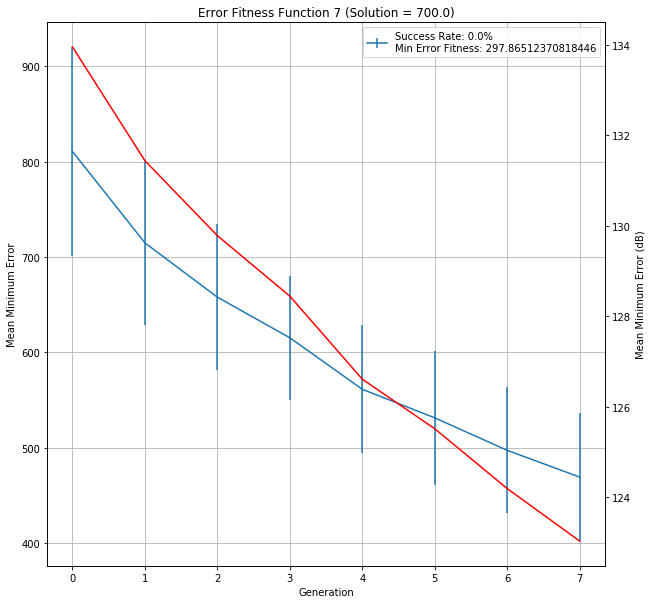

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_30_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,30,0.01,486.234632,438.278186,530.269406,384.763323,568.370627,431.954075,...,526.359565,453.638557,390.180132,583.416461,493.429077,437.578112,451.843967,469.359523,0:11:18,3000
